
  # Implementation of various Linear Model on Boston Data

## RIDGE AND LASSO 

In [4]:
from sklearn.datasets import load_boston
import seaborn as sns

data = load_boston()
df1 = pd.DataFrame(data.data)
df1.columns = data.feature_names
df1['Price'] = data.target
df1.head()

<IPython.core.display.Javascript object>

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
df1.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

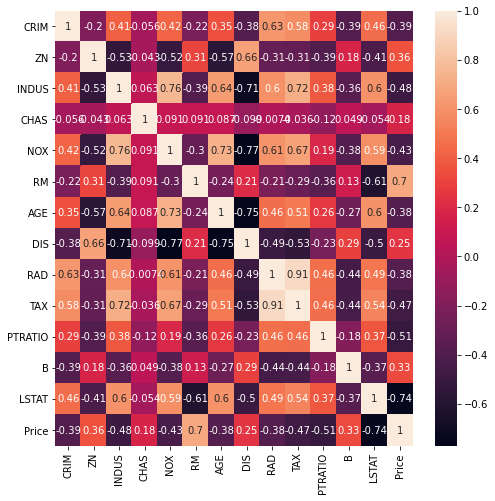

In [6]:

plt.figure(figsize =(8,8))
sns.heatmap(df1.corr(),annot =True)
plt.show()

In [7]:

x1 = df1[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX','PTRATIO','B', 'LSTAT']].copy()

y1 = df1['Price'].copy()

In [8]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(x1,y1,test_size = 0.25, random_state =42)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)


StandardScaler()

In [10]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [11]:
x_test_scaled

array([[-0.40670502, -0.50281197, -1.0181089 , ..., -0.73590341,
         0.42030222, -0.48657531],
       [-0.41096131,  1.23157471, -0.67825799, ..., -0.29361449,
         0.4363212 , -1.25847275],
       [-0.40502371, -0.50281197,  2.39336067, ...,  0.81210781,
         0.35862916,  0.77843992],
       ...,
       [-0.40071683, -0.50281197, -0.60625567, ..., -0.16092782,
         0.28150923, -0.93906691],
       [-0.37546815, -0.50281197, -0.5385735 , ...,  0.59096335,
         0.4363212 , -0.67429629],
       [-0.41550665,  3.18275972, -1.00370844, ..., -0.16092782,
         0.38517489, -0.86201726]])

In [12]:

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
cvs  =cross_val_score(lr, x_train_scaled,y_train, scoring = 'neg_root_mean_squared_error', cv = 3)
print('Mean error is: {}'.format(cvs.mean()))

Mean error is: -5.0899610556455555


In [13]:
sklearn.metrics.SCORERS.keys() # to find available scoring methods

<IPython.core.display.Javascript object>

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

C:\Users\ishan\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

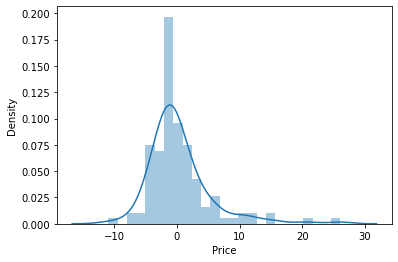

In [14]:
lr.fit(x_train_scaled,y_train)
predict_linear = lr.predict(x_test_scaled)
sns.distplot(y_test - predict_linear)

In [15]:
from sklearn import metrics
print('MSE: ',metrics.mean_squared_error(y_test,predict_linear))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,predict_linear)))

MSE:  25.609695610870617


<IPython.core.display.Javascript object>

RMSE:  5.060602297243937


In [16]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
ridge =Ridge()
parameters = {'alpha' :[1e-15,1e-10,1e-8,1e-5,1e-3,1e-0,1,5,10,15,20,25,30,35,40,45]}
ridge_regressor  =GridSearchCV(ridge, parameters, scoring  ='neg_root_mean_squared_error',cv =3)
ridge_regressor.fit(x_train_scaled,y_train)
print('Ridge best alpha:',ridge_regressor.best_params_)
print('Ridge best score:',ridge_regressor.best_score_)



Ridge best alpha: {'alpha': 5}
Ridge best score: -5.088592915300317


C:\Users\ishan\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

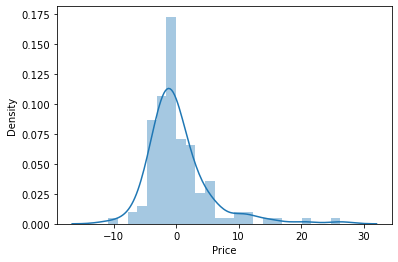

In [17]:
predict_ridge = ridge_regressor.predict(x_test_scaled)
sns.distplot(y_test - predict_ridge)

In [18]:


print('MSE: ',metrics.mean_squared_error(y_test,predict_ridge))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,predict_ridge)))

MSE:  25.702179134606546


<IPython.core.display.Javascript object>

RMSE:  5.06973166297848


In [19]:
lasso =Lasso()
parameters = {'alpha' :[1e-15,1e-10,1e-8,1e-5,1e-3,1e-0,1,5,10,15,20,25,30,35,40,45]}
lasso_regressor  =GridSearchCV(lasso, parameters, scoring  ='neg_root_mean_squared_error',cv =3)
lasso_regressor.fit(x_train_scaled,y_train)
print('Ridge best alpha:',lasso_regressor.best_params_)
print('Ridge best score:',lasso_regressor.best_score_)

Ridge best alpha: {'alpha': 0.001}
Ridge best score: -5.089922697608842


C:\Users\ishan\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 341.3068821312959, tolerance: 2.207714138888889
  positive)


C:\Users\ishan\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

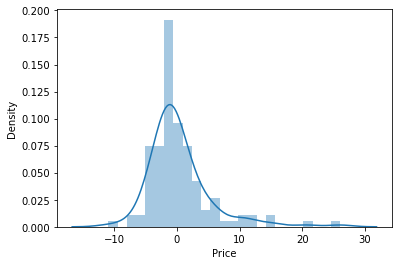

In [20]:

predict_lasso = lasso_regressor.predict(x_test_scaled)
sns.distplot(y_test - predict_lasso)


In [21]:
print('MSE: ',metrics.mean_squared_error(y_test,predict_lasso))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,predict_lasso)))

MSE:  25.613293916212143


<IPython.core.display.Javascript object>

RMSE:  5.060957806207452


# Trying Non linear Polynomial Regresion

In [22]:
from sklearn.preprocessing import PolynomialFeatures

In [33]:
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(x_train)
test_x_poly = poly.fit_transform(x_test)
train_x_poly

array([[1.00000000e+00, 9.10300000e-02, 0.00000000e+00, ...,
        1.55330574e+05, 1.89965840e+03, 2.32324000e+01],
       [1.00000000e+00, 3.53501000e+00, 0.00000000e+00, ...,
        7.74576010e+03, 1.32191020e+03, 2.25600400e+02],
       [1.00000000e+00, 3.57800000e-02, 2.00000000e+01, ...,
        1.50009036e+05, 1.45628560e+03, 1.41376000e+01],
       ...,
       [1.00000000e+00, 1.50100000e-02, 8.00000000e+01, ...,
        1.52834084e+05, 2.34173060e+03, 3.58801000e+01],
       [1.00000000e+00, 1.11604000e+01, 0.00000000e+00, ...,
        1.20670225e+04, 2.55620950e+03, 5.41492900e+02],
       [1.00000000e+00, 2.28760000e-01, 0.00000000e+00, ...,
        5.01264000e+03, 7.52604000e+02, 1.12996900e+02]])

In [34]:
lr = LinearRegression()
cvs  =cross_val_score(lr, train_x_poly,y_train, scoring = 'neg_root_mean_squared_error', cv = 3)
print('Mean error is: {}'.format(cvs.mean()))

Mean error is: -6.721376580806724


C:\Users\ishan\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

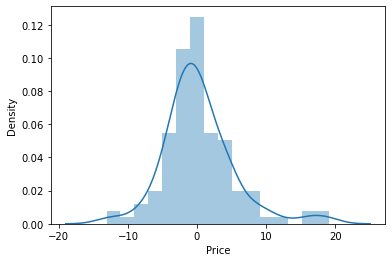

In [35]:
lr.fit(train_x_poly,y_train)
predict_linear = lr.predict(test_x_poly)
sns.distplot(y_test - predict_linear)

In [36]:
print('MSE: ',metrics.mean_squared_error(y_test,predict_linear))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,predict_linear)))

MSE:  26.680172969136848


<IPython.core.display.Javascript object>

RMSE:  5.165285371510159
